In [20]:
!pip install mat73

In [95]:
import mat73
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt, freqz, iirnotch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statistics
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

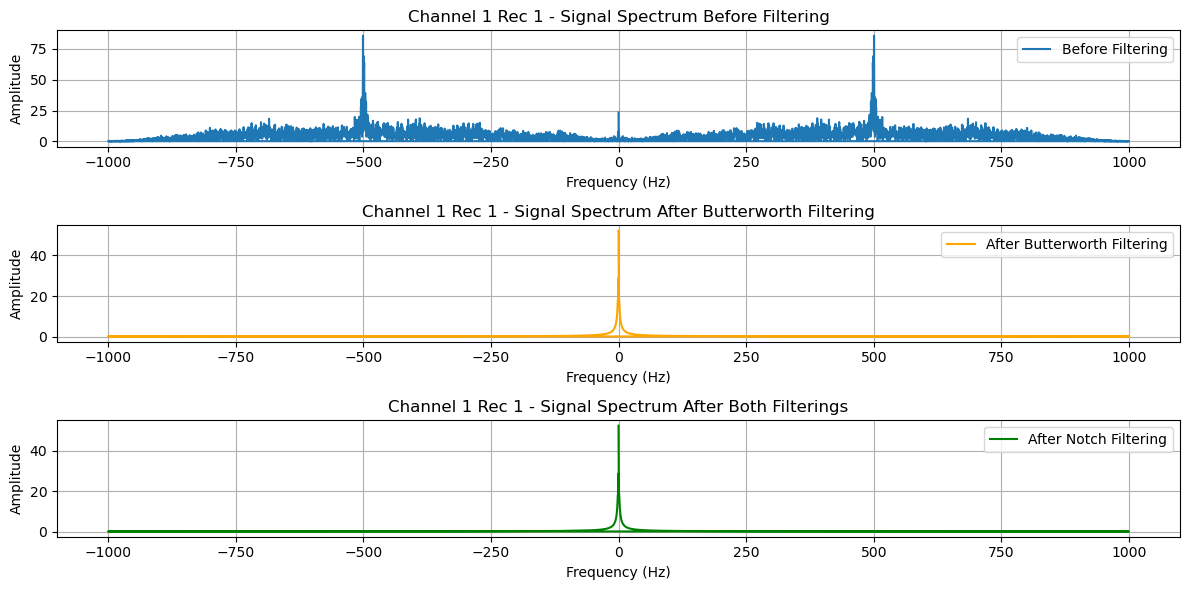

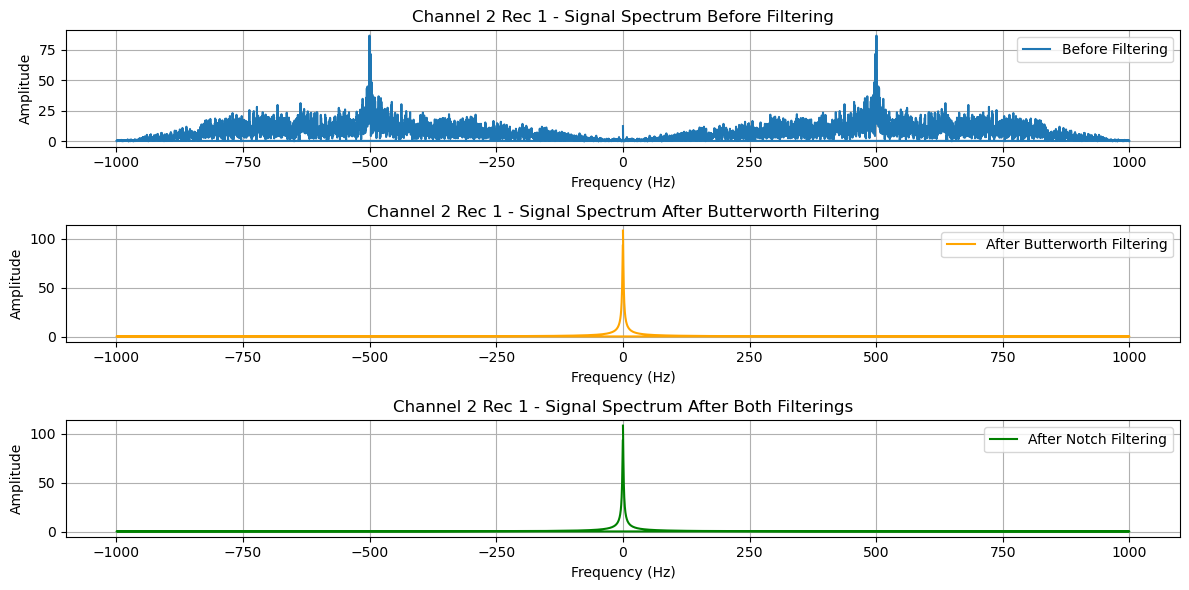

In [22]:
# Part A :

# loading the data that has been converted to .mat file
data_dict = mat73.loadmat('our_lab2.mat')


channel1_rec1_data = data_dict['data__chan_1_rec_1']
channel2_rec1_data = data_dict['data__chan_2_rec_1']

# sampling frequency
fs = 2000

# cutoff frequency
lowcut = 1
# filter order
order = 1

# normalize cutoff frequency
nyq = 0.5 * fs
low = lowcut / nyq
# low pass filter
b, a = butter(order, low, btype='low')


filtered_channel1_rec1_data = filtfilt(b, a, channel1_rec1_data)
filtered_channel2_rec1_data = filtfilt(b, a, channel2_rec1_data)

# notch filter parameters
power_line_freq = 50
# Quality factor
Q = 30
# Bandwidth
bw = power_line_freq / Q
# notch filter
b_notch, a_notch = iirnotch(power_line_freq, bw, fs)

filtered_notch_channel1_rec1_data = filtfilt(b_notch, a_notch, filtered_channel1_rec1_data)
filtered_notch_channel2_rec1_data = filtfilt(b_notch, a_notch, filtered_channel2_rec1_data)

def plot_spectrum(data, filtered_data_butterworth, filtered_data_notch, title):

    # we need to calculate FFT of data to plot the spectrum
    fft_data = np.fft.fft(data)
    fft_filtered_data_butterworth = np.fft.fft(filtered_data_butterworth)
    fft_filtered_data_notch = np.fft.fft(filtered_data_notch)
    freq = np.fft.fftfreq(len(data), 1/fs)

    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(freq, np.abs(fft_data), label='Before Filtering')
    plt.title(title + ' - Signal Spectrum Before Filtering')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(freq, np.abs(fft_filtered_data_butterworth), label='After Butterworth Filtering', color='orange')
    plt.title(title + ' - Signal Spectrum After Butterworth Filtering')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(freq, np.abs(fft_filtered_data_notch), label='After Notch Filtering', color='green')
    plt.title(title + ' - Signal Spectrum After Both Filterings')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_spectrum(channel1_rec1_data, filtered_channel1_rec1_data, filtered_notch_channel1_rec1_data, 'Channel 1 Rec 1')
plot_spectrum(channel2_rec1_data, filtered_channel2_rec1_data, filtered_notch_channel2_rec1_data, 'Channel 2 Rec 1')



In [23]:
# Part B :

# time spans for each label (in seconds)
time_labels = [(4.73, 12.93), (12.93, 20.33), (20.33, 27.63), (27.63, 34.85)]

# time interval of each span
x1_interval = 12.93*200 - 4.73*200
x2_interval = 20.33*200 - 12.93*200
x3_interval = 27.63*200 - 20.33*200
x4_interval = 34.85*200 - 27.63*200


# data of each time span for channel 1
x1_train_channel1 = filtered_notch_channel1_rec1_data[int(4.73*200) : int(4.73*200 + 0.8*x1_interval)]
x1_test_channel1 = filtered_notch_channel1_rec1_data[int(4.73*200 + 0.8*x1_interval) : int(12.93*200)]
x2_train_channel1 = filtered_notch_channel1_rec1_data[int(12.93*200) : int(12.93*200 + 0.8*x2_interval)]
x2_test_channel1 = filtered_notch_channel1_rec1_data[int(12.93*200 + 0.8*x2_interval) : int(20.33*200)]
x3_train_channel1 = filtered_notch_channel1_rec1_data[int(20.33*200) : int(20.33*200 + 0.8*x3_interval)]
x3_test_channel1 = filtered_notch_channel1_rec1_data[int(20.33*200 + 0.8*x3_interval) : int(27.63*200)]
x4_train_channel1 = filtered_notch_channel1_rec1_data[int(27.63*200) : int(27.63*200 + 0.8*x4_interval)]
x4_test_channel1 = filtered_notch_channel1_rec1_data[int(27.63*200 + 0.8*x4_interval) : int(34.85*200)]

# data of each time span for channel 2
x1_train_channel2 = filtered_notch_channel2_rec1_data[int(4.73*200) : int(4.73*200 + 0.8*x1_interval)]
x1_test_channel2 = filtered_notch_channel2_rec1_data[int(4.73*200 + 0.8*x1_interval) : int(12.93*200)]
x2_train_channel2 = filtered_notch_channel2_rec1_data[int(12.93*200) : int(12.93*200 + 0.8*x2_interval)]
x2_test_channel2 = filtered_notch_channel2_rec1_data[int(12.93*200 + 0.8*x2_interval) : int(20.33*200)]
x3_train_channel2 = filtered_notch_channel2_rec1_data[int(20.33*200) : int(20.33*200 + 0.8*x3_interval)]
x3_test_channel2 = filtered_notch_channel2_rec1_data[int(20.33*200 + 0.8*x3_interval) : int(27.63*200)]
x4_train_channel2 = filtered_notch_channel2_rec1_data[int(27.63*200) : int(27.63*200 + 0.8*x4_interval)]
x4_test_channel2 = filtered_notch_channel2_rec1_data[int(27.63*200 + 0.8*x4_interval) : int(34.85*200)]

# merge all train and test data for channel 1
train_channel1 = [x1_train_channel1, x2_train_channel1, x3_train_channel1, x4_train_channel1]
test_channel1 = [x1_test_channel1, x2_test_channel1, x3_test_channel1, x4_test_channel1]

# merge all train and test data for channel 2
train_channel2 = [x1_train_channel2, x2_train_channel2, x3_train_channel2, x4_train_channel2]
test_channel2 = [x1_test_channel2, x2_test_channel2, x3_test_channel2, x4_test_channel2]


# normalize data to mean = 0 and variance = 1
def normalize_data(data):
    normalized_data = []
    mean = []
    std = []
    for i in range(4):
        mean.append(np.mean(data[i]))
        std.append(np.std(data[i]))
        normalized_data.append((data[i] - mean[i]) / std[i])
    normalized_data = [normalized_data[0], normalized_data[1], normalized_data[2], normalized_data[3]]
    return normalized_data

# X(features)
x_train_channel1_normalized = normalize_data(train_channel1)
x_test_channel1_normalized = normalize_data(test_channel1)
x_train_channel2_normalized = normalize_data(train_channel2)
x_test_channel2_normalized = normalize_data(test_channel2)


# y(Labels)
y = [1, 2, 3, 4]

In [34]:
# part C:
def divide_signal_into_windows(signal, window_length_ms, overlap_ms, fs):
    window_length_samples = int(window_length_ms / 1000 * fs)
    overlap_samples = int(overlap_ms / 1000 * fs)

    num_samples = len(signal)
    current_position = 0

    windows = []

    while current_position + window_length_samples < num_samples:
        window = signal[current_position:current_position + window_length_samples]
        windows.append(window)
        current_position += overlap_samples

    return windows


# apply segmentation on X_train and X_test
fs = 200

# first channel
list_of_windows_of_X_train_channel1 = []
for i in range(len(x_train_channel1_normalized)):
  res = divide_signal_into_windows(x_train_channel1_normalized[i],200,190,fs)
  for j in range(len(res)):
    list_of_windows_of_X_train_channel1.append(res[j])
list_of_windows_of_X_test_channel1 = []
for i in range(len(x_test_channel1_normalized)):
  res = divide_signal_into_windows(x_test_channel1_normalized[i],200,190,fs)
  for j in range(len(res)):
    list_of_windows_of_X_test_channel1.append(res[j])
# second channel
list_of_windows_of_X_train_channel2 = []
for i in range(len(x_train_channel2_normalized)):
  res = divide_signal_into_windows(x_train_channel2_normalized[i],200,190,fs)
  for j in range(len(res)):
    list_of_windows_of_X_train_channel2.append(res[j])
list_of_windows_of_X_test_channel2 = []
for i in range(len(x_test_channel2_normalized)):
  res = divide_signal_into_windows(x_test_channel2_normalized[i],200,190,fs)
  for j in range(len(res)):
    list_of_windows_of_X_test_channel2.append(res[j])
    

print(np.shape(list_of_windows_of_X_test_channel1))
print(np.shape(list_of_windows_of_X_test_channel2))
print(np.shape(list_of_windows_of_X_train_channel1))
print(np.shape(list_of_windows_of_X_train_channel1))


(29, 40)
(29, 40)
(125, 40)
(125, 40)


In [69]:
# part D:
# extract dataframe from filtered_notch_channel1_rec1_data
fs = 200

def set_label(n,num):
  if num >= 0 and num<= int(n/4):
    return 1
  elif num > int(n/4) and num<= int(n/2):
    return 2
  elif num > int(n/2) and num<= int(3*n/4):
    return 3
  else:
    return 4

def extract_features(array):
  results = []
  # mean absolute value
  abs_array = np.abs(array)
  MAV = statistics.mean(abs_array)
  results.append(MAV)

  # variance
  VAR = np.var(array)
  results.append(VAR)

  # standard deviation
  STD = np.std(array)
  results.append(STD)

  # root mean square
  RMS = np.sqrt(np.mean(np.square(array)))
  results.append(RMS)

  return results

def creating_dataframe(lst):
  # creating dataframe
  data = []
  num = len(lst)
  for i in range(num):
    result = extract_features(lst[i])
    result.append(set_label(num,i))
    data.append(result)
  df = pd.DataFrame(data, columns=['MAV', 'VAR', 'STD', 'RMS','label'])
  return df

# apply functions to show dataframes
ch1_train = creating_dataframe(list_of_windows_of_X_train_channel1)
ch1_test = creating_dataframe(list_of_windows_of_X_test_channel1)
ch2_train = creating_dataframe(list_of_windows_of_X_train_channel2)
ch2_test = creating_dataframe(list_of_windows_of_X_test_channel2)
# channel1
print(ch1_train)


          MAV       VAR       STD       RMS  label
0    1.547199  0.002001  0.044736  1.547845      1
1    1.400154  0.001771  0.042085  1.400787      1
2    1.295584  0.000506  0.022495  1.295779      1
3    1.238879  0.000184  0.013563  1.238953      1
4    1.180228  0.000567  0.023811  1.180468      1
..        ...       ...       ...       ...    ...
120  1.141909  0.004147  0.064394  1.143723      4
121  1.392087  0.007457  0.086352  1.394763      4
122  1.676741  0.007286  0.085360  1.678913      4
123  1.969270  0.008571  0.092582  1.971445      4
124  2.283415  0.009858  0.099288  2.285572      4

[125 rows x 5 columns]


In [84]:
def find_param(df1, df2):
    
    # Select the first 4 columns from each DataFrame
    selected_columns_df1 = df1.iloc[:, :4]
    selected_columns_df2 = df2.iloc[:, :4]

    # Concatenate the selected columns horizontally (axis=1) into a 2D matrix
    combined_matrix = pd.concat([selected_columns_df1, selected_columns_df2], axis=1)

    # Convert the combined matrix to a NumPy array (if needed)
    x = combined_matrix.to_numpy()
    
    # Select the 5th column from each DataFrame
    selected_column_df1 = df1.iloc[:, 4]
    
    # Convert the combined matrix to a NumPy array (if needed)
    y = selected_column_df1.to_numpy()
    
    return x, y

X_train, y_train = find_param(ch1_train, ch2_train)
X_test, y_test = find_param(ch1_test, ch2_test)

Accuracy: 0.28


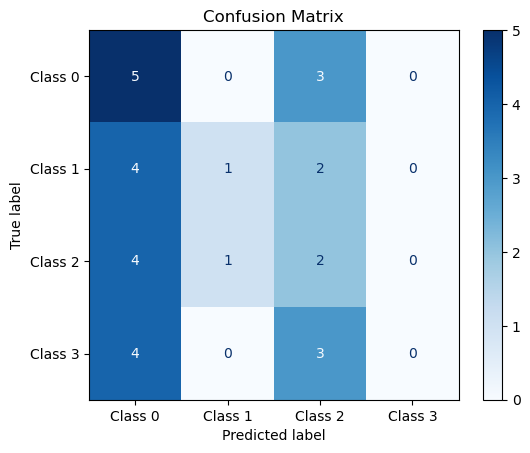

In [97]:
# Create an SVM classifier with an RBF kernel
classifier_rbf = SVC(kernel='rbf')
classifier_rbf.fit(X_train, y_train)

# Predict classes for the testing data
y_pred = classifier_rbf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels (if needed)
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]  # Replace with your actual class names

# Create a ConfusionMatrixDisplay object and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Blues', values_format='.0f')
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.31


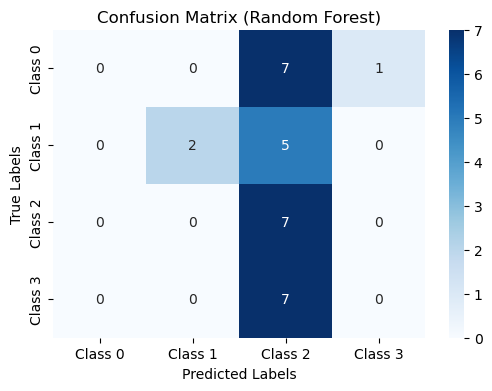

In [98]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['Class 0', 'Class 1', 'Class 2', "Class 3"]  # Replace with your actual class names

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()